In [28]:
# plot the blob energy vs electron energy

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors
from mpl_interactions import ioff, panhandler, zoom_factory

In [3]:
parts = pd.read_hdf("../config/ATPC_single.h5", "MC/particles")
parts = parts[parts.primary == 1]
hits = pd.read_hdf("../config/ATPC_single.h5", "MC/hits")

In [41]:
energies = []
inital_energy = []

for event in parts.event_id.unique():
    event_part = parts[parts.event_id == event]
    event_hits = hits[hits.event_id == event]

    event_hits['distance'] = np.sqrt((event_hits['x'] - event_part.final_x.iloc[0])**2 + (event_hits['y'] - event_part.final_y.iloc[0])**2 + (event_hits['z'] - event_part.final_z.iloc[0])**2)

    # Filter the DataFrame
    df_within_radius = event_hits[event_hits['distance'] <= 500]

    # Drop the distance column if it's not needed
    df_within_radius = df_within_radius.drop(columns=['distance'])

    total_energy = df_within_radius['energy'].sum()

    energies.append(total_energy)
    inital_energy.append(event_part.kin_energy.iloc[0])


/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_39444/660583890.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_hits['distance'] = np.sqrt((event_hits['x'] - event_part.final_x.iloc[0])**2 + (event_hits['y'] - event_part.final_y.iloc[0])**2 + (event_hits['z'] - event_part.final_z.iloc[0])**2)


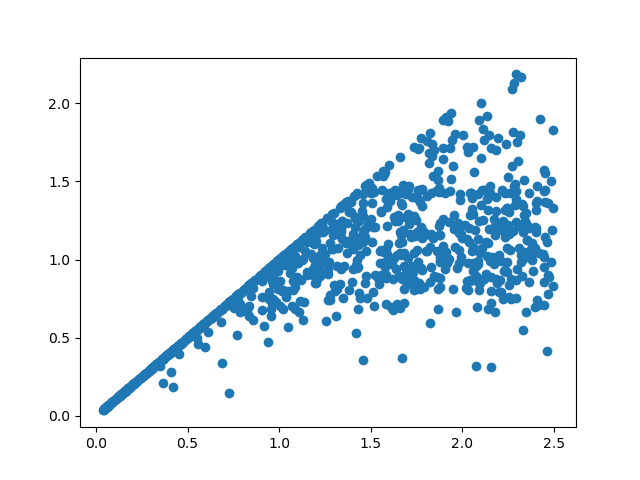

In [42]:
plt.figure()


plt.scatter(inital_energy, energies)

/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_39444/2290068590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_hits['distance'] = np.sqrt((event_hits['x'] - event_part.final_x.iloc[0])**2 + (event_hits['y'] - event_part.final_y.iloc[0])**2 + (event_hits['z'] - event_part.final_z.iloc[0])**2)


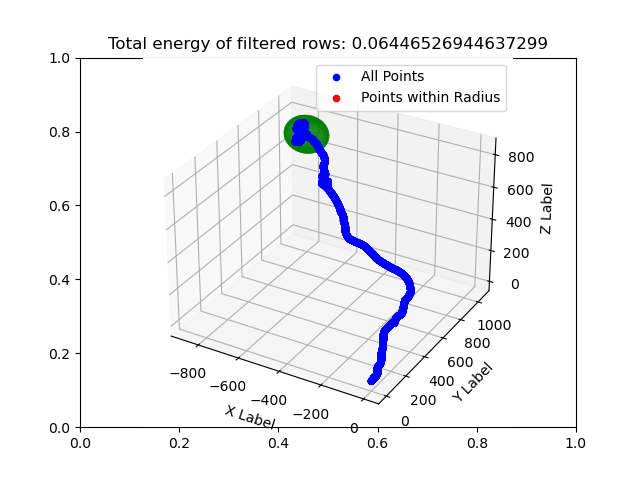

In [36]:
%matplotlib widget

event_part = parts[parts.event_id == 10]
event_hits = hits[hits.event_id == 10]
event_hits['distance'] = np.sqrt((event_hits['x'] - event_part.final_x.iloc[0])**2 + (event_hits['y'] - event_part.final_y.iloc[0])**2 + (event_hits['z'] - event_part.final_z.iloc[0])**2)
df_within_radius = event_hits[event_hits['distance'] <= 5]
df_within_radius = df_within_radius.drop(columns=['distance'])



# Plotting
# Make a 3D view of the track
# fig  = plt.figure(figsize=(10, 10))
with plt.ioff():
    fig, axis = plt.subplots()

# Create 3D axes
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of all points
ax.scatter(event_hits['x'], event_hits['y'], event_hits['z'], c='blue', label='All Points')

# Highlight points within the radius
ax.scatter(df_within_radius['x'], df_within_radius['y'], df_within_radius['z'], c='red', label='Points within Radius')

# Draw a circle (actually a sphere outline)
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = event_part.final_x.iloc[0] + 100 * np.outer(np.cos(u), np.sin(v))
y = event_part.final_y.iloc[0] + 100 * np.outer(np.sin(u), np.sin(v))
z = event_part.final_z.iloc[0] + 100 * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_wireframe(x, y, z, color='green', alpha=0.3)

# Setting labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title(f'Total energy of filtered rows: {total_energy}')
ax.legend()

# Show plot
disconnect_zoom = zoom_factory(axis)
# Enable scrolling and panning with the help of MPL
# Interactions library function like panhandler.
pan_handler = panhandler(fig)
display(fig.canvas)